<a href="https://colab.research.google.com/github/hyeonisism/ml/blob/main/kant_diamond_cat_boost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install pandas numpy matplotlib seaborn torch scikit-learn catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 5.1 MB/s eta 0:00:00


0:	learn: 3647.4693210	test: 3666.6758774	best: 3666.6758774 (0)	total: 132ms	remaining: 2m 11s
100:	learn: 564.4893155	test: 557.2461076	best: 557.2461076 (100)	total: 5.4s	remaining: 48s
200:	learn: 525.8790395	test: 536.4904385	best: 536.4904385 (200)	total: 12.8s	remaining: 50.7s
300:	learn: 505.7526106	test: 526.9277093	best: 526.8510827 (298)	total: 17.4s	remaining: 40.4s
400:	learn: 489.3554703	test: 521.2823347	best: 521.2823347 (400)	total: 20.7s	remaining: 30.9s
500:	learn: 476.3825932	test: 517.3212129	best: 517.2801567 (496)	total: 24.7s	remaining: 24.6s
600:	learn: 465.6308104	test: 514.3303897	best: 514.3303897 (600)	total: 27.5s	remaining: 18.3s
700:	learn: 455.8440751	test: 513.2547547	best: 513.1768710 (660)	total: 30.3s	remaining: 12.9s
800:	learn: 446.5232590	test: 511.6781923	best: 511.6781923 (800)	total: 33.1s	remaining: 8.23s
900:	learn: 438.1893518	test: 510.4188362	best: 510.3318799 (897)	total: 37.5s	remaining: 4.12s
999:	learn: 430.8049307	test: 509.6364085	b

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50696 (\N{HANGUL SYLLABLE YE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 52769 (\N{HANGUL SYLLABLE CEUG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44050 (\N{HANGUL SYLLABLE GABS}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49892 (\N{HANGUL SYLLABLE SIL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51228 (\N{HANGUL SYLLABLE JE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/

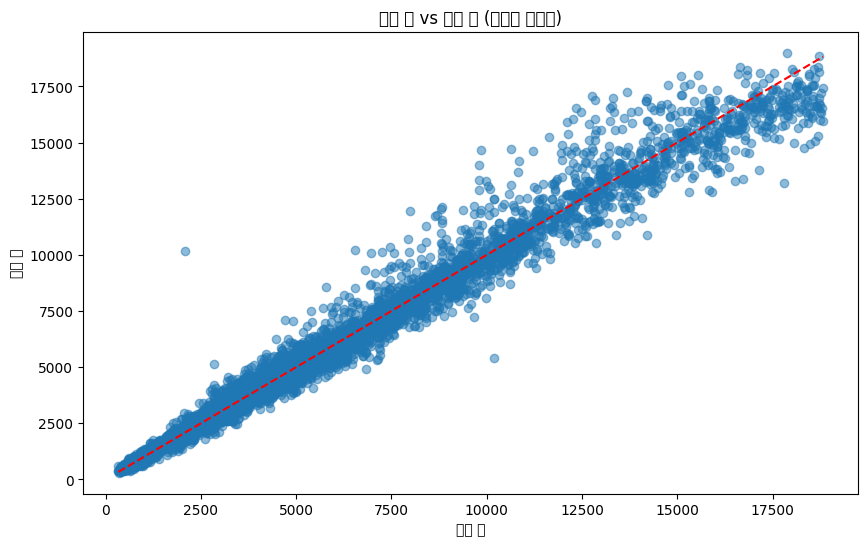

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from catboost import CatBoostRegressor, Pool  # CatBoost 라이브러리
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

url = 'https://raw.githubusercontent.com/mwaskom/seaborn-data/master/diamonds.csv'
data = pd.read_csv(url)

# 불필요한 열을 삭제합니다.
data.drop(columns=['Unnamed: 0'], inplace=True, errors='ignore')

# x, y, z 값이 0인 행을 제거합니다.
data = data[(data[['x', 'y', 'z']] != 0).all(axis=1)].reset_index(drop=True)

# 특성과 레이블을 분리합니다.
X = data.drop('price', axis=1)
y = data['price']

# 범주형 변수의 인덱스를 지정합니다.
categorical_features = ['cut', 'color', 'clarity']
cat_features_indices = [X.columns.get_loc(col) for col in categorical_features]

# 학습용과 테스트용 데이터로 분할합니다.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# CatBoost의 Pool 객체를 생성합니다.
train_pool = Pool(X_train, y_train, cat_features=cat_features_indices)
test_pool = Pool(X_test, y_test, cat_features=cat_features_indices)

# CatBoost 회귀 모델을 정의합니다.
model = CatBoostRegressor(
    iterations=1000,
    learning_rate=0.1,
    depth=6,
    eval_metric='RMSE',
    random_seed=42,
    verbose=100
)

# 모델을 학습합니다.
model.fit(train_pool, eval_set=test_pool, early_stopping_rounds=50)

# 테스트 데이터에 대한 예측을 수행합니다.
y_pred = model.predict(X_test)

# 모델의 성능을 평가합니다.
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"\n테스트 데이터 RMSE: {rmse:.2f}")
print(f"테스트 데이터 R^2 스코어: {r2:.4f}")

# 실제 값과 예측 값을 비교하는 산점도를 그립니다.
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.title('실제 값 vs 예측 값 (테스트 데이터)')
plt.xlabel('실제 값')
plt.ylabel('예측 값')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.show()